# Word Embedding in PyTorch + Lightning

In [1]:
import torch
import torch.nn as nn 
from torch.optim import Adam
from torch.distributions.uniform import Uniform 
from torch.utils.data import TensorDataset, DataLoader

import lightning as L 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Troll2 is great 
# Gymkata is great
# Input : Troll2 is great Gymkata

# Encoding the training data
inputs = torch.tensor([[1.,0.,0.,0],        # One Hot encoding - troll2
                       [0.,1.,0.,0.],       # One Hot encoding - is
                       [0.,0.,1.,0.],       # One Hot encoding - great
                       [0.,0.,0.,1.]])      # One Hot encoding - gymkata

labels = torch.tensor([[0.,1.,0.,0],        # One Hot encoding - is
                       [0.,0.,1.,0.],       # One Hot encoding - great
                       [0.,0.,0.,1.],       # One Hot encoding - gymkata
                       [0.,1.,0.,0.]])      # One Hot encoding - is

dataset = TensorDataset(inputs,labels)
dataloader = DataLoader(dataset)

### Use of DataLoader 
1. They make it easy to access data in batches 
2. They make it easy to shuffle data in each epoch 
3. They make it easy to use a relatively small fraction of data if we want to do a quick and dirty training for debugging

```py
class WordEmbeddingFromScratch():
    def __init__():
        # Create & Initialize Weight tensors, and create the loss function 
    def forward(self,input):
        # Make a forward pass through the network
    def configure_optimizers(self):
        # Configure Adam Optimizer
    def training_step(self,batch,batch_idx):
        # Calculate Loss 
```

In [3]:
class WordEmbeddingFromScratch(L.LightningModule):

    def __init__(self):
        super().__init__()
        # Using Uniform Distribution to generate random number 
        min_value = -0.5 
        max_value = 0.5 
        
        self.input1_w1 = nn.Parameter(Uniform(min_value,max_value).sample())
        self.input1_w2 = nn.Parameter(Uniform(min_value,max_value).sample())
        self.input2_w1 = nn.Parameter(Uniform(min_value,max_value).sample())
        self.input2_w2 = nn.Parameter(Uniform(min_value,max_value).sample())
        self.input3_w1 = nn.Parameter(Uniform(min_value,max_value).sample())
        self.input3_w2 = nn.Parameter(Uniform(min_value,max_value).sample())
        self.input4_w1 = nn.Parameter(Uniform(min_value,max_value).sample())
        self.input4_w2 = nn.Parameter(Uniform(min_value,max_value).sample())

        self.output1_w1 = nn.Parameter(Uniform(min_value,max_value).sample())
        self.output1_w2 = nn.Parameter(Uniform(min_value,max_value).sample())
        self.output2_w1 = nn.Parameter(Uniform(min_value,max_value).sample())
        self.output2_w2 = nn.Parameter(Uniform(min_value,max_value).sample())
        self.output3_w1 = nn.Parameter(Uniform(min_value,max_value).sample())
        self.output3_w2 = nn.Parameter(Uniform(min_value,max_value).sample())
        self.output4_w1 = nn.Parameter(Uniform(min_value,max_value).sample())
        self.output4_w2 = nn.Parameter(Uniform(min_value,max_value).sample())
        
        self.loss = nn.CrossEntropyLoss()
    
    def forward(self,input):
        
        input = input[0]
        inputs_to_top_hidden = ((input[0]*self.input1_w1)+
                               (input[1]*self.input2_w1)+
                               (input[2]*self.input3_w1)+
                               (input[3]*self.input4_w1))
        inputs_to_bottom_hidden = ((input[0]*self.input1_w2)+
                                  (input[1]*self.input2_w2)+
                                  (input[2]*self.input3_w2)+
                                  (input[3]*self.input4_w2))
        
        output1 = ((inputs_to_top_hidden * self.output1_w1) + 
                   (inputs_to_bottom_hidden * self.output1_w2))
        output2 = ((inputs_to_top_hidden * self.output2_w1) + 
                   (inputs_to_bottom_hidden * self.output2_w2))
        output3 = ((inputs_to_top_hidden * self.output3_w1) + 
                   (inputs_to_bottom_hidden * self.output3_w2))
        output4 = ((inputs_to_top_hidden * self.output4_w1) + 
                   (inputs_to_bottom_hidden * self.output4_w2))
        
        # To preserve the gradients using torch.stack(), for backpropagation
        output_presoftmax = torch.stack([output1,output2,output3,output4])
        return(output_presoftmax)

    def configure_optimizers(self):
        return Adam(self.parameters(), lr=0.1) 

    def training_step(self,batch,batch_idx):
        input_i, label_i = batch        
        output_i = self.forward(input_i)
        loss = self.loss(output_i, label_i[0]) 
        return loss

`def training_step`: 
* `input_i, label_i = batch `: Split batch of training data into input, and labels (ideal output values)
* `loss = self.loss(output_i, label_i[0])`: Run those output values generated by forward (output_i) along with the ideal values through the loss function nn.CrossEntropyLoss() then runs the output values through s SoftMax() Function and quantifies the difference betweeen the softmax output and ideal values 

In [4]:
modelFromScratch = WordEmbeddingFromScratch()

# print("Before optimization, the parameters are...")
# for name, param in modelFromScratch.named_parameters():
#     print(name, param.data)

In [5]:
data={
    "w1":[ modelFromScratch.input1_w1.item(),
          modelFromScratch.input2_w1.item(),
          modelFromScratch.input3_w1.item(),
          modelFromScratch.input4_w1.item(),],
    "w2":[ modelFromScratch.input1_w2.item(),
          modelFromScratch.input2_w2.item(),
          modelFromScratch.input3_w2.item(),
          modelFromScratch.input4_w2.item(),],
    "token":["Troll2","is","great","Gymkata"],
    "input":["input1","input2","input3","input4"]
}
df = pd.DataFrame(data)
df

,w1,w2,token,input
0,-0.394602,0.263560,Troll2,input1
1,0.217060,-0.344027,is,input2
2,-0.232051,0.286288,great,input3
3,0.455688,-0.094633,Gymkata,input4


Now, we can easily see that the weights for troll2 (w1=-0.220266, w2=-0.016077), and Gymkata (w1=-0.362463,w2=0.326919) , are relatively different even though they both represent movie titles that are used in the same context.

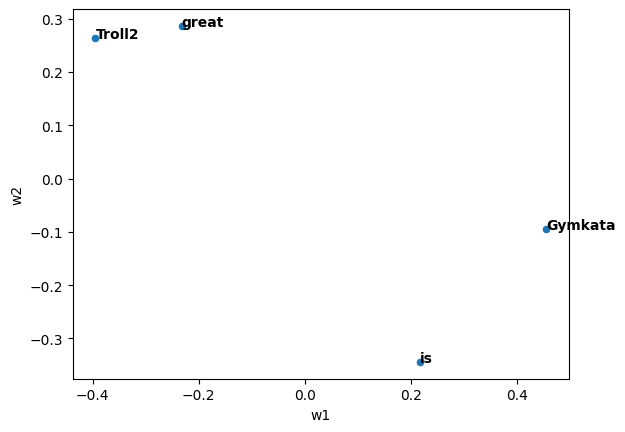

In [6]:
sns.scatterplot(data=df, x="w1", y="w2")
plt.text(df.w1[0],df.w2[0],df.token[0], horizontalalignment='left', size='medium', color='black',weight='semibold')
plt.text(df.w1[1],df.w2[1],df.token[1], horizontalalignment='left', size='medium', color='black',weight='semibold')
plt.text(df.w1[2],df.w2[2],df.token[2], horizontalalignment='left', size='medium', color='black',weight='semibold')
plt.text(df.w1[3],df.w2[3],df.token[3], horizontalalignment='left', size='medium', color='black',weight='semibold')
plt.show()

We can see that the embedding values for Troll2 and Gymkata are pretty different, and that means we need to train our Embedding network. 

We start training by creating a Lightning Trainer, called trainer, and tell it to train for at most 100 epochs. Which means we will do backpropagation for every weight using the training data at most 100 times.

In [7]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(modelFromScratch, train_dataloaders=dataloader)

You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | loss         | CrossEntropyLoss | 0      | train
  | other params | n/a              | 16     | n/a  
----------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode
/Users/sanjeeb/Desktop/Harbin Institute of Technology/Artificial Intelligence/AI_Codes/.venv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing th

Epoch 99: 100%|██████████| 4/4 [00:00<00:00, 153.54it/s, v_num=9]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 4/4 [00:00<00:00, 96.86it/s, v_num=9] 


In [8]:
data={
    "w1":[ modelFromScratch.input1_w1.item(),
          modelFromScratch.input2_w1.item(),
          modelFromScratch.input3_w1.item(),
          modelFromScratch.input4_w1.item(),],
    "w2":[ modelFromScratch.input1_w2.item(),
          modelFromScratch.input2_w2.item(),
          modelFromScratch.input3_w2.item(),
          modelFromScratch.input4_w2.item(),],
    "token":["Troll2","is","great","Gymkata"],
    "input":["input1","input2","input3","input4"]
}
df = pd.DataFrame(data)
df

,w1,w2,token,input
0,0.332076,2.388683,Troll2,input1
1,0.893969,-2.718088,is,input2
2,-2.477659,-0.348136,great,input3
3,0.464947,2.167552,Gymkata,input4


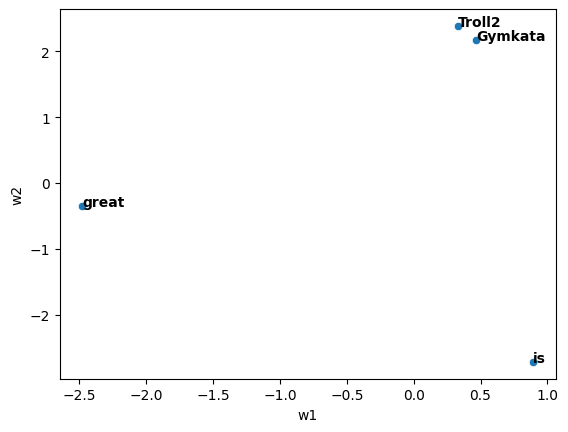

In [9]:
sns.scatterplot(data=df, x="w1", y="w2")
plt.text(df.w1[0],df.w2[0],df.token[0], horizontalalignment='left', size='medium', color='black',weight='semibold')
plt.text(df.w1[1],df.w2[1],df.token[1], horizontalalignment='left', size='medium', color='black',weight='semibold')
plt.text(df.w1[2],df.w2[2],df.token[2], horizontalalignment='left', size='medium', color='black',weight='semibold')
plt.text(df.w1[3],df.w2[3],df.token[3], horizontalalignment='left', size='medium', color='black',weight='semibold')
plt.show()

And, now we can see that after training the Embedding network, the embedding values for Troll2 and Gymkata are very similar, which is great since they are used in similar context

In [10]:
softmax = nn.Softmax(dim=0)
print(torch.round(softmax(modelFromScratch(torch.tensor([[1.,0.,0.,0.]]))),decimals=2))
print(torch.round(softmax(modelFromScratch(torch.tensor([[0.,1.,0.,0.]]))),decimals=2))
print(torch.round(softmax(modelFromScratch(torch.tensor([[0.,0.,1.,0.]]))),decimals=2))
print(torch.round(softmax(modelFromScratch(torch.tensor([[0.,0.,0.,1.]]))),decimals=2))

tensor([0., 1., 0., 0.], grad_fn=<RoundBackward1>)
tensor([0., 0., 1., 0.], grad_fn=<RoundBackward1>)
tensor([0., 0., 0., 1.], grad_fn=<RoundBackward1>)
tensor([0., 1., 0., 0.], grad_fn=<RoundBackward1>)


# Pytorch linear function to create same network

In [11]:
class WordEmbeddingWithLinear(L.LightningModule):

    def __init__(self):
        super().__init__()
        self.input_to_hidden = nn.Linear(in_features=4,out_features=2,bias=False)
        self.hidden_to_output = nn.Linear(in_features=2,out_features=4,bias=False)
        self.loss = nn.CrossEntropyLoss()
    
    def forward(self,input):
        hidden = self.input_to_hidden(input)
        output_values = self.hidden_to_output(hidden) 
        return(output_values)

    def configure_optimizers(self):
        return Adam(self.parameters(), lr=0.1)
    
    def training_step(self,batch,batch_idx):
        input_i, label_i = batch        
        output_i = self.forward(input_i)
        loss = self.loss(output_i, label_i) 
        return loss
        

In [12]:
modelLinear = WordEmbeddingWithLinear()

data={
    "w1":modelLinear.input_to_hidden.weight.detach()[0].numpy(),
    "w2":modelLinear.input_to_hidden.weight.detach()[1].numpy(),
    "token":["Troll2","is","great","Gymkata"],
    "input":["input1","input2","input3","input4"]
}
df = pd.DataFrame(data)
df

,w1,w2,token,input
0,-0.389947,0.174259,Troll2,input1
1,-0.460252,0.206664,is,input2
2,-0.259422,-0.452506,great,input3
3,0.288348,0.483564,Gymkata,input4


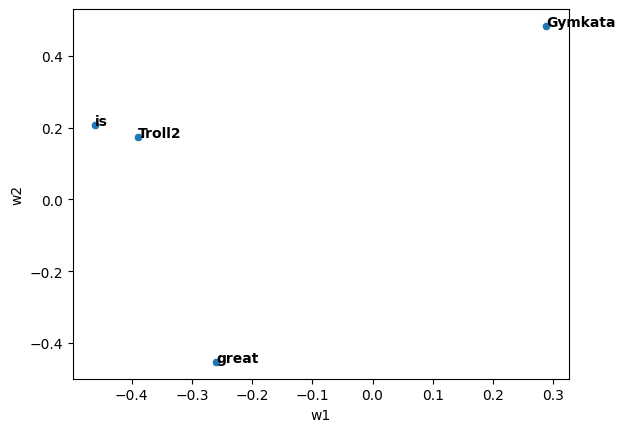

In [13]:
sns.scatterplot(data=df, x="w1", y="w2")
plt.text(df.w1[0],df.w2[0],df.token[0], horizontalalignment='left', size='medium', color='black',weight='semibold')
plt.text(df.w1[1],df.w2[1],df.token[1], horizontalalignment='left', size='medium', color='black',weight='semibold')
plt.text(df.w1[2],df.w2[2],df.token[2], horizontalalignment='left', size='medium', color='black',weight='semibold')
plt.text(df.w1[3],df.w2[3],df.token[3], horizontalalignment='left', size='medium', color='black',weight='semibold')
plt.show()

In [14]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(modelLinear, train_dataloaders=dataloader)

You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name             | Type             | Params | Mode 
--------------------------------------------------------------
0 | input_to_hidden  | Linear           | 8      | train
1 | hidden_to_output | Linear           | 8      | train
2 | loss             | CrossEntropyLoss | 0      | train
--------------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode
/Users/sanjeeb/Desktop/Harbin Institute of Technology/Artificial Intelligence/AI_Codes/.venv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader'

Epoch 99: 100%|██████████| 4/4 [00:00<00:00, 117.48it/s, v_num=10]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 4/4 [00:00<00:00, 96.17it/s, v_num=10] 


In [15]:
modelLinear = WordEmbeddingWithLinear()

data={
    "w1":modelLinear.input_to_hidden.weight.detach()[0].numpy(),
    "w2":modelLinear.input_to_hidden.weight.detach()[1].numpy(),
    "token":["Troll2","is","great","Gymkata"],
    "input":["input1","input2","input3","input4"]
}
df = pd.DataFrame(data)
df

,w1,w2,token,input
0,-0.030561,-0.426485,Troll2,input1
1,-0.162059,0.118860,is,input2
2,-0.175114,-0.120226,great,input3
3,-0.170444,-0.113014,Gymkata,input4


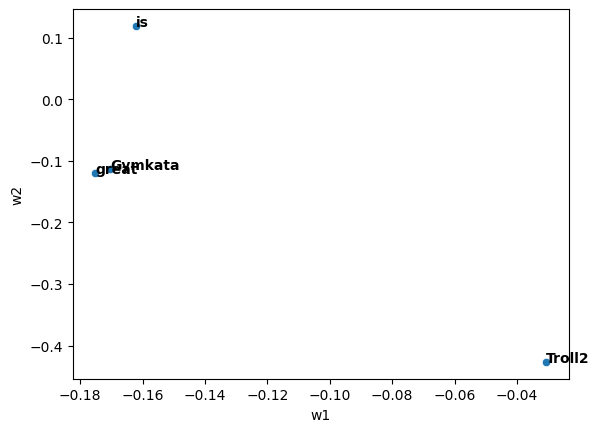

In [16]:
sns.scatterplot(data=df, x="w1", y="w2")
plt.text(df.w1[0],df.w2[0],df.token[0], horizontalalignment='left', size='medium', color='black',weight='semibold')
plt.text(df.w1[1],df.w2[1],df.token[1], horizontalalignment='left', size='medium', color='black',weight='semibold')
plt.text(df.w1[2],df.w2[2],df.token[2], horizontalalignment='left', size='medium', color='black',weight='semibold')
plt.text(df.w1[3],df.w2[3],df.token[3], horizontalalignment='left', size='medium', color='black',weight='semibold')
plt.show()

# Loading and using pre-trained Embedding values with nn.Embedding

In [17]:
modelLinear.input_to_hidden.weight

Parameter containing:
tensor([[-0.0306, -0.1621, -0.1751, -0.1704],
        [-0.4265,  0.1189, -0.1202, -0.1130]], requires_grad=True)

In [18]:
word_embeddings = nn.Embedding.from_pretrained(modelLinear.input_to_hidden.weight.T)
word_embeddings.weight

Parameter containing:
tensor([[-0.0306, -0.4265],
        [-0.1621,  0.1189],
        [-0.1751, -0.1202],
        [-0.1704, -0.1130]])

In [20]:
word_embeddings(torch.tensor(0))

tensor([-0.0306, -0.4265])

In [21]:
vocab = {
    'Troll2':0,
    'is':1,
    'great':2,
    'Gymkata': 3
}
word_embeddings(torch.tensor(vocab['Troll2']))

tensor([-0.0306, -0.4265])